In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os

from utils_plot import get_predefined_color_labels, plotDicts, abbreviateValue

from run_pruned_v2 import run_pruning_experiment


In [89]:
import json
import os

dataset_name_file = 'wine' 
pruning_type = '_pruned'
min_support_tree = 0.1
type_criterion = 'divergence_criterion'
metric = 'd_error'
results_all = {}

output_dir = 'output_results_12_28'
output_results = os.path.join(os.path.curdir, output_dir, 'performance')


info_i = 'time'
conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
conf_name = f'{conf_name[:-2]}_top_1000_i'
            
            
if os.path.isfile(os.path.join(output_results, f'{conf_name}_{info_i}.json')):
    with open(os.path.join(output_results, f'{conf_name}_{info_i}.json')) as json_file:
        results_all['original'] = json.load(json_file)
        
        
output_dir = 'output_tmp'
output_results = os.path.join(os.path.curdir, output_dir, 'performance')



conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
conf_name = f'{conf_name[:-2]}_top_1000_i'
            
            
if os.path.isfile(os.path.join(output_results, f'{conf_name}_{info_i}.json')):
    with open(os.path.join(output_results, f'{conf_name}_{info_i}.json')) as json_file:
        results_all['new'] = json.load(json_file)

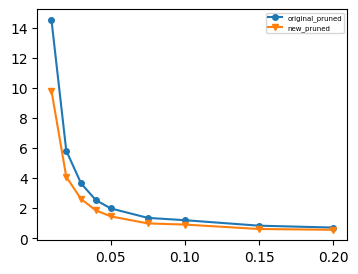

In [90]:
info_plot = {}

for k in results_all:
    for sup in results_all[k]:
        for pruning in ['', '_pruned']:
            if 'generalized' + pruning in results_all[k][sup]:
                config_key = k+pruning
                if config_key not in info_plot:
                    info_plot[config_key] = {}
                info_plot[config_key][float(sup)] = results_all[k][sup]['generalized'+pruning]
        
        
from utils_plot import plotDicts

plotDicts(info_plot, marker=True)

In [91]:
t = 17500
((t/1.5)/60)/60, (t/60)/60

(3.2407407407407405, 4.861111111111112)

In [92]:
(5000)/60

83.33333333333333

In [93]:
{sup:info_plot['original_pruned'][sup] / info_plot['new_pruned'][sup] for sup in info_plot['original_pruned']}

{0.01: 1.4791626822563466,
 0.02: 1.4241080923611924,
 0.03: 1.3993131839866697,
 0.04: 1.3672769172865837,
 0.05: 1.3621666387615006,
 0.075: 1.3709079790172372,
 0.1: 1.3197876009400415,
 0.15: 1.355253306521415,
 0.2: 1.2585468089357925}

In [88]:
{sup:info_plot['original'][sup] / info_plot['new'][sup] for sup in info_plot['original']}

{0.01: 0.9445328708328612,
 0.02: 0.9840908128141234,
 0.03: 1.010224429199058,
 0.04: 1.036001341099434,
 0.05: 1.06884057502939,
 0.075: 1.0918494007589723,
 0.1: 1.0952920553367738,
 0.15: 1.1131302761224087,
 0.2: 1.1171799658214205}

In [3]:
type_criterions = [ 'divergence_criterion', 'entropy']
output_dir = 'output_results_12_28'



min_support_tree = 0.1
min_sup_divergences = [0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]

saveFig = False

size_fig = (3,3)

In [4]:

def _rename_dataset(name):
    if name  =='artificial_gaussian': 
        return 'synt.-peak' 
    if name == 'online_shoppers_intention':
        return 'intentions'
    return name



In [5]:
results_all = {}

In [6]:
        
abbreviations = {"one_at_time":"indiv t.", \
                        "divergence_criterion":"g$\\Delta$", "entropy":"entr", 'pruned': '- pruned'}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

In [7]:
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", 'comparisons')

In [8]:
saveFig = True

if saveFig:
    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)

In [9]:
type_gens = ['generalized']
datasets = ['adult', 'artificial_gaussian', 'compas', 'german', 'online_shoppers_intention', 'wine']
metrics = ['d_error', 'd_error', 'd_fpr', 'd_error', 'd_error', 'd_error']
colors_for_dataset_all = ["#EE552F", '#B574E8', '#5C72CD', '#5CCDAE', '#bdbdbd', '#88246a']
colors_for_dataset_pruned = ["#BF4425", '#9846D7', '#2e4193', '#277e66', '#7a7878', '#551642']

pruning_names = ['_pruned', '']
type_criterion = 'divergence_criterion'



In [10]:
color_labels = {}

 
for dataset_name, color_all, color_pruned in zip(datasets, colors_for_dataset_all[:len(datasets)], colors_for_dataset_pruned[:len(datasets)]):
    dataset_name = _rename_dataset(dataset_name)
    for config_str in ['base', 'generalized']:
        color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}', abbreviations)]=color_all  
            
        for pruning_type in pruning_names:
            color = color_all if pruning_type == '' else color_pruned
            color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}{pruning_type}', abbreviations)]=color

            
lines_style = {k:"-" for k in color_labels}
#lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
#lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

#lines_style.update({k:"dotted" for k in color_labels if( abbreviateValue("entropy", abbreviations) in k and abbreviations["entropy"] in k)})

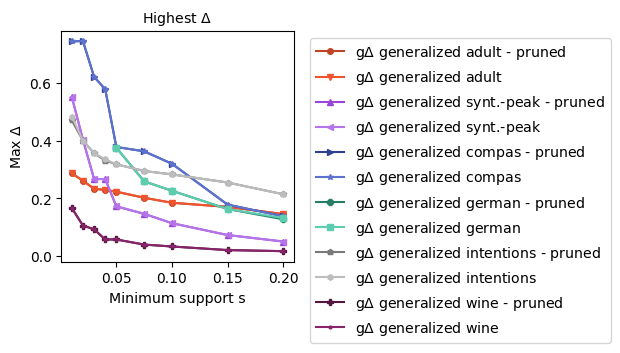

In [11]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}



for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = _rename_dataset(dataset_name_file)
    

    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for pruning_type in pruning_names:
        
        conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
        
        if dataset_name_file == 'online_shoppers_intention':
            conf_name = f'{conf_name[:-2]}_top_1000_i'
            
            
        if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
            with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                results_all[dataset_name]['time'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                results_all[dataset_name]['fp'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                results_all[dataset_name][f'max_{metric}' ][pruning_type] = json.load(json_file)    
        else:
            print(f'{conf_name} not available')
            

    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for pruning_type in  pruning_names:
        if pruning_type in results:
            for sup in sorted(results[pruning_type].keys()):
                for type_gen in type_gens:
                    config_key = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}{pruning_type}", abbreviations)
                    if config_key not in info_plot:
                        info_plot[config_key] = {}
                    type_gen_str = type_gen+pruning_type
                    info_plot[config_key][float(sup)] = results[pruning_type][sup][type_gen_str]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    figure_name = os.path.join(output_fig_dir, f"stree_{min_support_tree}_max_div_pruning.pdf")

    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)
            




# Plot (paper)

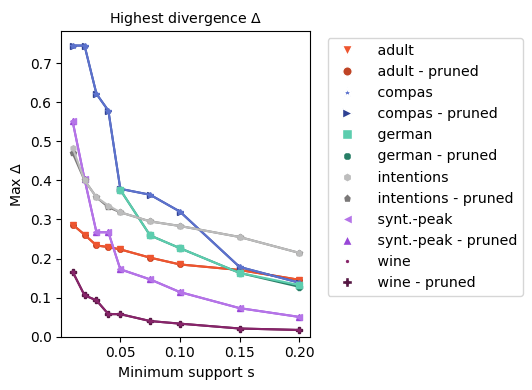

In [12]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit=(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=10.2
markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False
yscale="linear"
legendSize=10.2
saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (5.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    if marker:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=MARKERS[m_i],
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        m_i = m_i + 1
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)



plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()
idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i]]
#handles = [handles[i] for i in idxs]
legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

# Difference

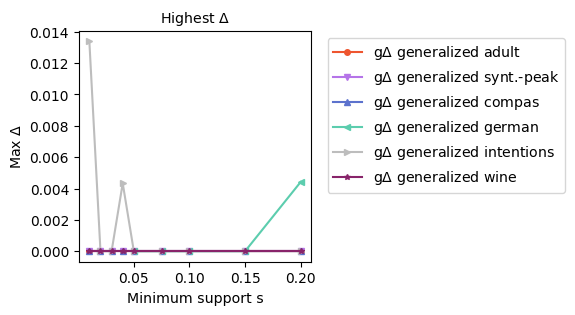

In [13]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}



for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = _rename_dataset(dataset_name_file)


    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for pruning_type in pruning_names:
        
        conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
        
        if dataset_name_file == 'online_shoppers_intention':
            conf_name = f'{conf_name[:-2]}_top_1000_i'
            
        if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
            with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                results_all[dataset_name]['time'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                results_all[dataset_name]['fp'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                results_all[dataset_name][f'max_{metric}' ][pruning_type] = json.load(json_file)    
        else:
            print(f'{conf_name} not available')
            

    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for pruning_type in  pruning_names:
        if pruning_type in results:
            for sup in sorted(results[pruning_type].keys()):
                for type_gen in type_gens:
                    config_key = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}", abbreviations)
                    if config_key not in info_plot:
                        info_plot[config_key] = {}
                    type_gen_str = type_gen+pruning_type
                    if float(sup) not in info_plot[config_key]:
                        info_plot[config_key][float(sup)] = 0
                    if pruning_type == '':
                        info_plot[config_key][float(sup)]+= results[pruning_type][sup][type_gen_str]
                    else:                        
                        info_plot[config_key][float(sup)]-= results[pruning_type][sup][type_gen_str]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    figure_name = os.path.join(output_fig_dir, f"stree_{min_support_tree}_max_div_pruning.pdf")

    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)
            




# Other

In [14]:
colors_for_dataset_all[0]

'#EE552F'

In [15]:
color_labels = {}

 
for dataset_name, color_all, color_pruned in zip(datasets, colors_for_dataset_all[:len(datasets)], colors_for_dataset_pruned[:len(datasets)]):
    dataset_name = _rename_dataset(dataset_name)
    for config_str in ['base', 'generalized']:
        color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}', abbreviations)]=color_all  
            
        for pruning_type in pruning_names:
            color = color_all if pruning_type == '' else color_pruned
            color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}{pruning_type}', abbreviations)]=color

In [16]:
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

lines_style.update({k:"dotted" for k in color_labels if( abbreviateValue("entropy", abbreviations) in k and abbreviations["entropy"] in k)})

adult
artificial_gaussian
compas
german
online_shoppers_intention
wine


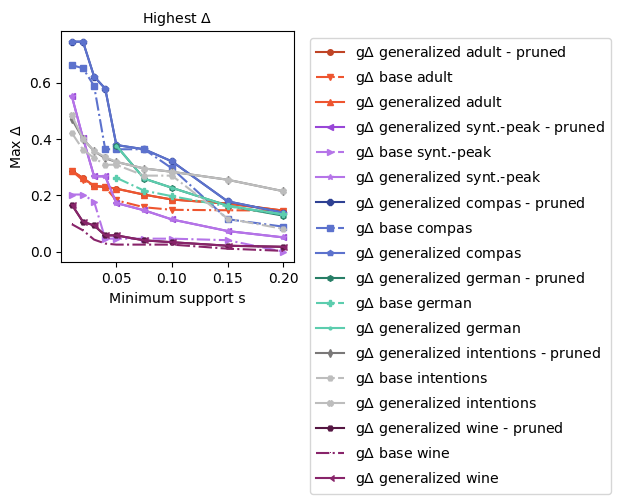

In [17]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}



for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = _rename_dataset(dataset_name_file)
    
    print(dataset_name_file)
        
    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for pruning_type in pruning_names:
        
        conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
        
        if dataset_name_file == 'online_shoppers_intention':
            conf_name = f'{conf_name[:-2]}_top_1000_i'
            

            
        if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
            with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                results_all[dataset_name]['time'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                results_all[dataset_name]['fp'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                results_all[dataset_name][f'max_{metric}' ][pruning_type] = json.load(json_file)    
        else:
            print(f'{conf_name} not available')
            

    info_i =f'max_{metric}' 
    results = results_all[dataset_name][info_i]

    for pruning_type in  pruning_names:
        if pruning_type in results:
            for sup in sorted(results[pruning_type].keys()):
                for type_gen in ['base', 'generalized']:
                    if type_gen == 'base' and pruning_type=='_pruned':
                        continue
                    config_key = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}{pruning_type}", abbreviations)
                    if config_key not in info_plot:
                        info_plot[config_key] = {}
                    type_gen_str = type_gen+pruning_type
                    info_plot[config_key][float(sup)] = results[pruning_type][sup][type_gen_str]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    figure_name = os.path.join(output_fig_dir, f"stree_{min_support_tree}_max_div_pruning.pdf")

    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)
            





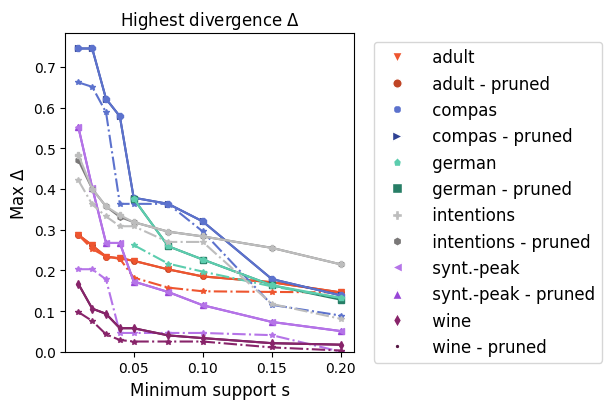

In [18]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit=(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=12
markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False
yscale="linear"
legendSize=12
saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.3,4.2)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=marker_i,
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)



plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [19]:
nameFig

'./output_results_12_28/figures/comparisons/heuristic_comparison_vs_base.pdf'

# Time

In [46]:
color_labels = {}

 
for dataset_name, color_all, color_pruned in zip(datasets, colors_for_dataset_all[:len(datasets)], colors_for_dataset_pruned[:len(datasets)]):
    dataset_name = _rename_dataset(dataset_name)
    for config_str in ['base', 'generalized']:
        color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}', abbreviations)]=color_all  
            
        for pruning_type in pruning_names:
            color = color_all if pruning_type == '' else color_pruned
            color_labels[abbreviateValue(f'{type_criterion}_{config_str}_{dataset_name}{pruning_type}', abbreviations)]=color

In [101]:
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"--" for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})

lines_style.update({k:"dotted" for k in color_labels if( abbreviateValue("entropy", abbreviations) in k and abbreviations["entropy"] in k)})

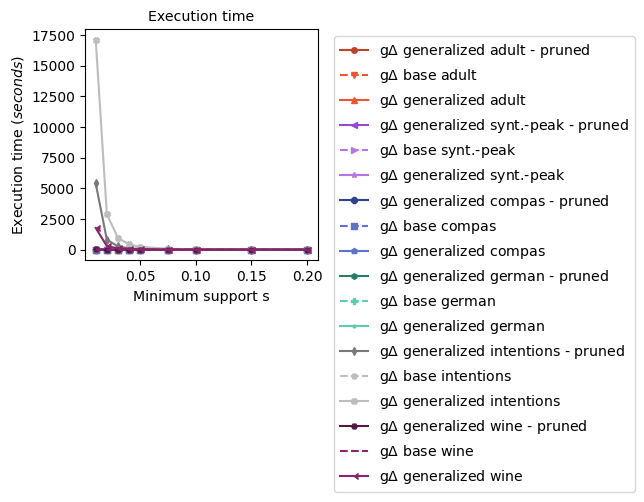

In [102]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}



for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = _rename_dataset(dataset_name_file)
    

    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for pruning_type in pruning_names:
        
        conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
        
        if dataset_name_file == 'online_shoppers_intention':
            conf_name = f'{conf_name[:-2]}_top_1000_i'
            
        if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
            with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                results_all[dataset_name]['time'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                results_all[dataset_name]['fp'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                results_all[dataset_name][f'max_{metric}' ][pruning_type] = json.load(json_file)    
        else:
            print(f'{conf_name} not available')
            

    info_i ='time' 
    results = results_all[dataset_name][info_i]

    for pruning_type in  pruning_names:
        if pruning_type in results:
            for sup in sorted(results[pruning_type].keys()):
                for type_gen in [ 'base', 'generalized']:
                    if type_gen == 'base' and pruning_type=='_pruned':
                        continue
                    config_key = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}{pruning_type}", abbreviations)
                    if config_key not in info_plot:
                        info_plot[config_key] = {}
                    type_gen_str = type_gen+pruning_type
                    info_plot[config_key][float(sup)] = results[pruning_type][sup][type_gen_str]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    figure_name = os.path.join(output_fig_dir, f"stree_{min_support_tree}_max_div_pruning.pdf")

    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)
            





In [103]:
min_v = min([info_dicts[k][0.2] for k in info_dicts])
max_v = min([info_dicts[k][0.01] for k in info_dicts if 0.01 in info_dicts[k] ])

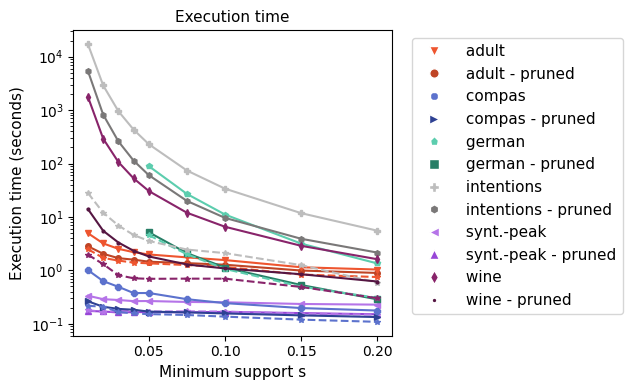

In [104]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= None#(min_v, max_v) #(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel= 'Execution time (seconds)'
title= 'Execution time'

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    #if 'pruned' not in label_name:
    #    if 'base' not in label_name:
    #        continue
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=marker_i,
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

    
yscale="log"



if limit is not None:
    if yscale == 'log':
        import math
        to_log = lambda x: math.log(x) if x!=None else None
        #limit = (to_log(limit[0]), to_log(limit[1]))
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)




plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

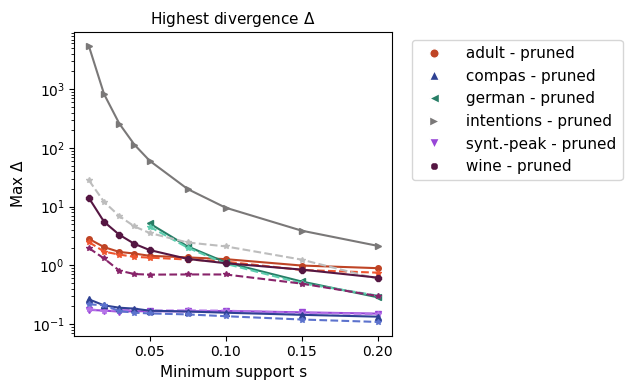

In [105]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= None#(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    if 'pruned' not in label_name:
        if 'base' not in label_name:
            continue
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=marker_i,
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)


yscale="log"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

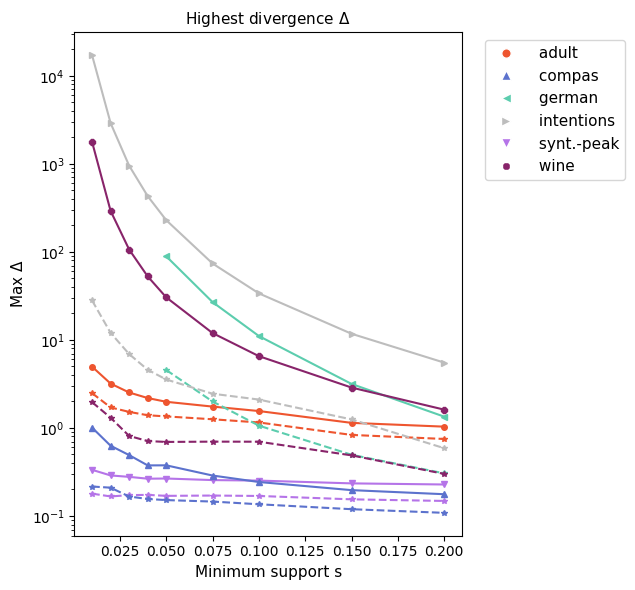

In [106]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= None#(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,6)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    if 'pruned' in label_name:
        continue
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=marker_i,
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)


yscale="log"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

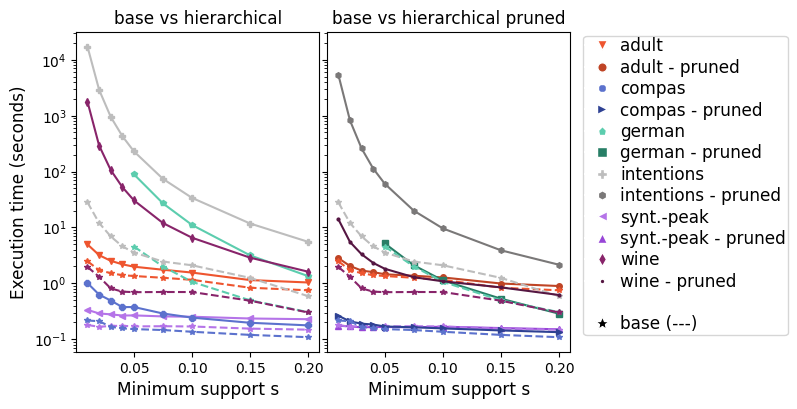

In [142]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= None#(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=12.2
legendSize=12.2

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Execution time (seconds)"
title1=f"base vs hierarchical"
title2=f"base vs hierarchical pruned"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (7.8,3.9)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=size_fig, dpi=100, sharey = True, constrained_layout = True)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'


markers = {}
m_i = 0
for label_name in info_dicts:
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        markers[label_name] = marker_i

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    
    if 'pruned' in label_name:
        axs = [ax2]
    elif 'base' in label_name:
        axs = [ax1, ax2]
    else:
        axs = [ax1]
    
    for ax in axs:
        ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=markers[label_name] if marker else None,
                linewidth=linewidth,
                markersize=markersize if marker else None,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

ax1.set_xlabel(xlabel, fontsize=labelSize)
ax2.set_xlabel(xlabel, fontsize=labelSize)
ax1.set_ylabel(ylabel, fontsize=labelSize)
ax1.set_title(title1, fontsize=labelSize)
ax2.set_title(title2, fontsize=labelSize)

yscale="log"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()


handles = handles + handles2
labels = labels + labels2

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Line',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
i = idxs[0]
legend_handles.append(Line2D([0], [0], marker=MARKER_BASE, color='w', linestyle='-.',
                              markerfacecolor = 'white', markersize=handles[i]._markersize*2.5))


legend_handles.append(Line2D([0], [0], marker=MARKER_BASE, color='w', linestyle='-.',
                              markerfacecolor = 'black', markersize=handles[i]._markersize*2.5))

labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')[1:] for i in idxs]
labels.append("")

labels.append(r'base (---)')



outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        labelspacing=0.2,
        columnspacing=0.2,
        fontsize=5,
        title_fontsize=5,
        borderaxespad = 0.2,
               borderpad = 0.1,
               handletextpad = 0.1
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        columnspacing=0.2,
        borderpad=borderpad,
    ) 

    
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base_time.pdf') 
if saveFig:
    fig.tight_layout(pad = 0.03)
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [119]:
labels

[' adult',
 ' adult - pruned',
 ' compas',
 ' compas - pruned',
 ' german',
 ' german - pruned',
 ' intentions',
 ' intentions - pruned',
 ' synt.-peak',
 ' synt.-peak - pruned',
 ' wine',
 ' wine - pruned',
 'base exploration (---)']

# Split

[]

In [26]:
datasets_plot = ['intentions', 'german', 'wine']

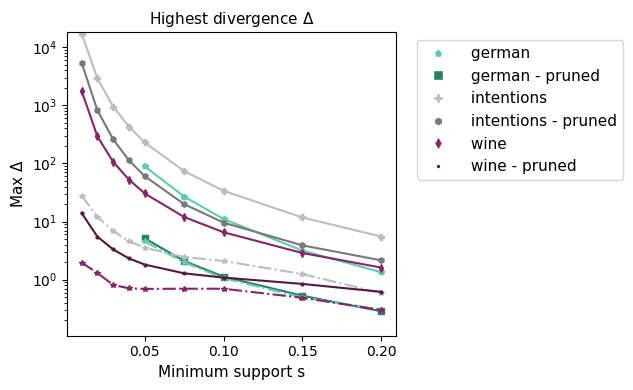

In [27]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= (min_v, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    
    to_plot = False
    for dataset_i in datasets_plot:
        if dataset_i in label_name:
            to_plot = True
            break
    
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
                
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

    else:
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                color=colors[e],
                linestyle=linestyle[label_name],
            )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)


yscale="log"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [28]:
datasets_plot = list(set(datasets)-set(['intentions', 'german', 'wine']))

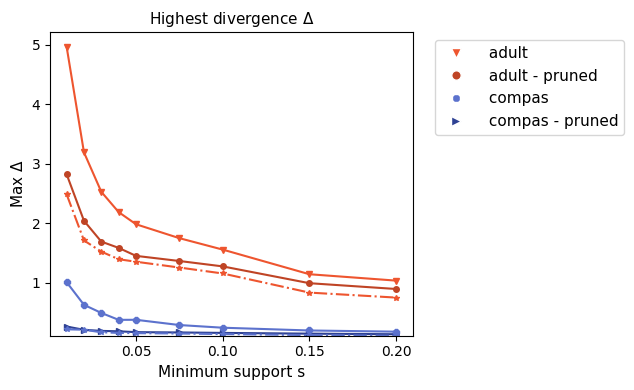

In [30]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= (min_v, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    
    to_plot = False
    for dataset_i in datasets_plot:
        if dataset_i in label_name:
            to_plot = True
            break
    
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
                
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

    else:
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                color=colors[e],
                linestyle=linestyle[label_name],
            )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)


yscale="linear"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 
    
nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

# Broken axis

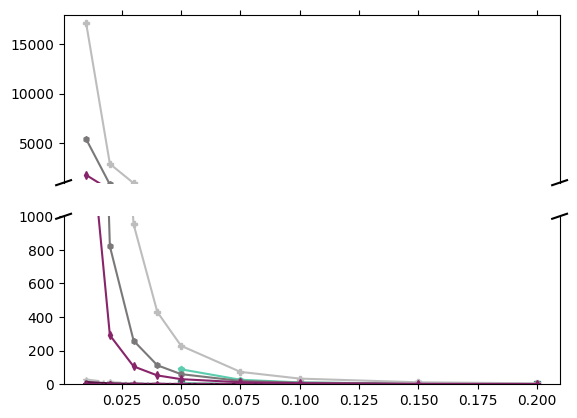

In [172]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
m_i = 0
for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    
    to_plot = False
    for dataset_i in datasets_plot:
        if dataset_i in label_name:
            to_plot = True
            break
    
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
                
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

            ax2.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

# zoom-in / limit the view to different portions of the data
split_value = 1000
ax.set_ylim(split_value, None)  # outliers only
ax2.set_ylim(0, split_value)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

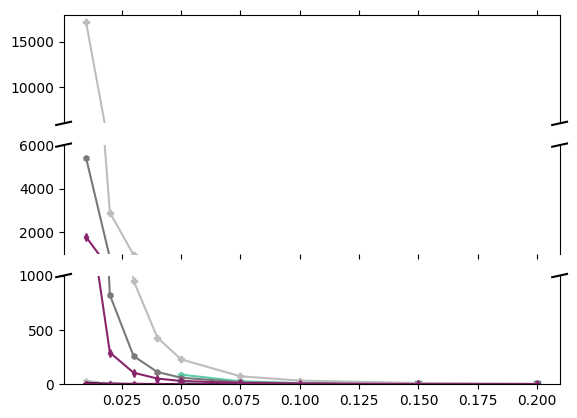

In [192]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# plot the same data on both axes
m_i = 0
for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    
    to_plot = False
    for dataset_i in datasets_plot:
        if dataset_i in label_name:
            to_plot = True
            break
    
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
                
        if to_plot:
            ax.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

            ax2.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )
            ax3.plot(
                list(info_dict.keys()),
                list(info_dict.values()),
                label=label_name,
                marker=marker_i,
                linewidth=linewidth,
                markersize=markersize,
                color=colors[e],
                linestyle=linestyle[label_name],
            )

# zoom-in / limit the view to different portions of the data
split_value1 = 1000
split_value2 = 6000
ax.set_ylim(split_value2, None)  # outliers only
ax2.set_ylim(split_value1, split_value2)  # most of the data
ax3.set_ylim(0, split_value1)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.tick_params(labelbottom=False)  # don't put tick labels at the top
ax3.tick_params(labeltop=False)  # don't put tick labels at the top
ax3.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal



kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

In [196]:
for d in dir(ax2.tick_params):
    print(d)

__call__
__class__
__delattr__
__dir__
__doc__
__eq__
__format__
__func__
__ge__
__get__
__getattribute__
__gt__
__hash__
__init__
__init_subclass__
__le__
__lt__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__self__
__setattr__
__sizeof__
__str__
__subclasshook__


In [136]:
d

0.015

In [21]:
nameFig

'./output_results_12_28/figures/comparisons/heuristic_comparison_vs_base.pdf'

In [143]:
dataset_name = 'intentions' 
result = results_all[dataset_name]['time']['']

ratio_i = {}
for sup in result:
    ratio_i[float(sup)] = {}
    ratio_i[float(sup)]['pruned'] = result[sup]['generalized_pruned']/result[sup]['base']
    ratio_i[float(sup)]['all'] = result[sup]['generalized']/result[sup]['base']
    ratio_i[float(sup)]['improvement'] = result[sup]['generalized']/result[sup]['generalized_pruned']

In [145]:
ratio_i = {'pruned':{}, 'all':{}, 'improvement':{}}

for dataset_name in results_all:
    result_all = results_all[dataset_name]['time']['']
    result_pruned = results_all[dataset_name]['time']['_pruned']
    if dataset_name not in ratio_i['pruned']:
        ratio_i['pruned'][dataset_name] = {}
        ratio_i['all'][dataset_name] = {}
        ratio_i['improvement'][dataset_name] = {}
    for sup in result_all:
            
            
        ratio_i['pruned'][dataset_name][float(sup)] = result_pruned[sup]['generalized_pruned']/result_all[sup]['base']
        ratio_i['all'][dataset_name][float(sup)] = result_all[sup]['generalized']/result_all[sup]['base']
        ratio_i['improvement'] [dataset_name][float(sup)]= result_all[sup]['generalized']/result_pruned[sup]['generalized_pruned']


In [155]:
import pandas as pd

summary = pd.DataFrame(ratio_i['improvement']).describe()

display(summary)

,adult,synt.-peak,compas,german,intentions,wine
count,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000
mean,1.375066,1.624754,2.193939,10.120742,3.421655,30.265855
std,0.202123,0.137732,0.834690,5.133558,0.419963,39.573307
min,1.151963,1.482633,1.323136,4.698844,2.569909,2.612387
25%,1.221526,1.515266,1.560120,5.961742,3.169992,6.022368
50%,1.366283,1.605349,2.053482,9.829433,3.530968,16.739893
75%,1.495189,1.702261,2.591809,12.831498,3.707687,32.081275
max,1.758812,1.922480,3.834319,17.282192,3.805472,126.452394


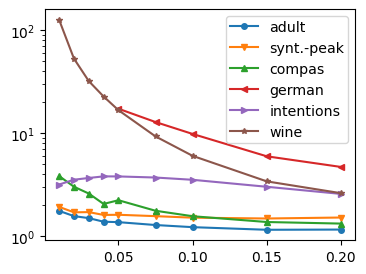

In [146]:
plotDicts(ratio_i['improvement'], marker= True, yscale='log', legendSize=10.2)

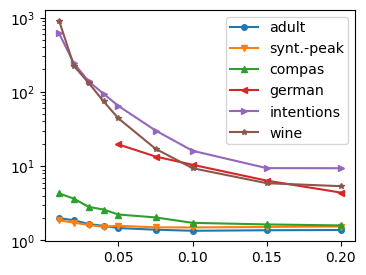

In [25]:
plotDicts(ratio_i['all'], marker= True, yscale='log', legendSize=10.2)

In [26]:
results

{'_pruned': {'0.01': {'base_pruned': 0.6615097522735596,
   'generalized_pruned': 14.032807350158691},
  '0.02': {'base_pruned': 0.5449848175048828,
   'generalized_pruned': 5.5004072189331055},
  '0.03': {'base_pruned': 0.43485426902770996,
   'generalized_pruned': 3.31441593170166},
  '0.04': {'base_pruned': 0.4580671787261963,
   'generalized_pruned': 2.3183040618896484},
  '0.05': {'base_pruned': 0.40698981285095215,
   'generalized_pruned': 1.8190572261810303},
  '0.075': {'base_pruned': 0.4599006175994873,
   'generalized_pruned': 1.2857019901275635},
  '0.1': {'base_pruned': 0.40812015533447266,
   'generalized_pruned': 1.0860395431518555},
  '0.15': {'base_pruned': 0.3333578109741211,
   'generalized_pruned': 0.8454489707946777},
  '0.2': {'base_pruned': 0.28031349182128906,
   'generalized_pruned': 0.6177842617034912}},
 '': {'0.01': {'base': 1.9638776779174805, 'generalized': 1774.4820840358734},
  '0.02': {'base': 1.306882381439209, 'generalized': 291.8703467845917},
  '0.03

In [27]:
(17122.06089448929 / 60)/60

4.7561280262470245

In [28]:
(5401.295127630234 / 60)/60

1.500359757675065

# FP

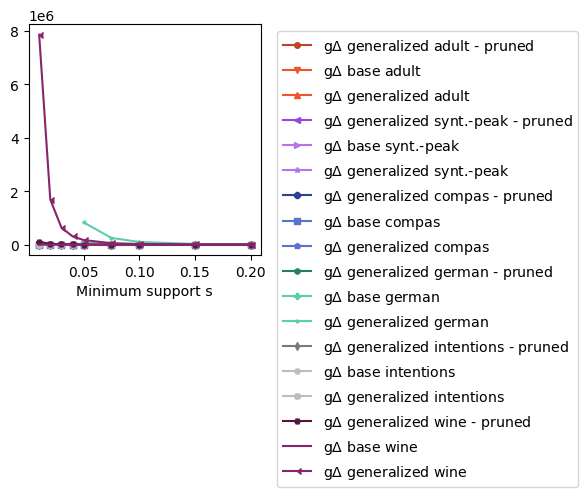

In [112]:
output_results = os.path.join(os.path.curdir, output_dir, 'performance')
from pathlib import Path

Path(output_results).mkdir(parents=True, exist_ok=True)
info_plot = {}



for dataset_name_file, metric in zip(datasets, metrics):
    
    dataset_name = _rename_dataset(dataset_name_file)
    

    results_all[dataset_name] = {'time':{}, 'fp': {}, f'max_{metric}' :{}}
    for pruning_type in pruning_names:

        
        conf_name = f"{dataset_name_file}_{metric}_{type_criterion}_{min_support_tree}{pruning_type}_i"
        
        if dataset_name_file == 'online_shoppers_intention':
            #continue
            conf_name = f'{conf_name[:-2]}_top_1000_i'
            
        if os.path.isfile(os.path.join(output_results, f'{conf_name}_time.json')):
            with open(os.path.join(output_results, f'{conf_name}_time.json')) as json_file:
                results_all[dataset_name]['time'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_fp.json')) as json_file:
                results_all[dataset_name]['fp'][pruning_type] = json.load(json_file)

            with open(os.path.join(output_results, f'{conf_name}_div.json')) as json_file:
                results_all[dataset_name][f'max_{metric}' ][pruning_type] = json.load(json_file)    
        else:
            print(f'{conf_name} not available')
            

    info_i ='fp' 
    results = results_all[dataset_name][info_i]

    for pruning_type in  pruning_names:
        if pruning_type in results:
            for sup in sorted(results[pruning_type].keys()):
                for type_gen in [ 'base', 'generalized']:
                    if type_gen == 'base' and pruning_type=='_pruned':
                        continue
                    config_key = abbreviateValue(f"{type_criterion}_{type_gen}_{dataset_name}{pruning_type}", abbreviations)
                    if config_key not in info_plot:
                        info_plot[config_key] = {}
                    type_gen_str = type_gen+pruning_type
                    info_plot[config_key][float(sup)] = results[pruning_type][sup][type_gen_str]


    for type_gen_str in info_plot:
        info_plot[type_gen_str] = dict(sorted(info_plot[type_gen_str].items()))


    title, ylabel = '', ''
    if info_i == 'time':
        title = 'Execution time'
        ylabel="Execution time $(seconds)$"

    elif info_i == f"max_{metric}":
        m = metric[2:].upper()

        ylabel=f"Max $\\Delta$"
        title=f"Highest $\\Delta$"

    elif info_i == 'FP':
        ylabel="#FP"
        title="#FP" 


    figure_name = os.path.join(output_fig_dir, f"stree_{min_support_tree}_max_div_pruning_fp.pdf")

    
size_fig = (3, 3)
plotDicts(info_plot, marker=True, \
            title=title, sizeFig=size_fig,\
                   linestyle=lines_style, color_labels=color_labels, \
            xlabel="Minimum support s",  ylabel=ylabel, labelSize=10.2,\
            outside=True,  saveFig=False, nameFig = figure_name, legendSize=10.2)
            





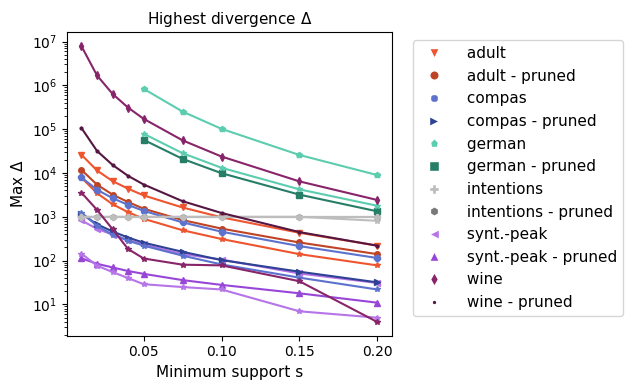

In [113]:
from utils_plot import MARKERS
from matplotlib.lines import Line2D 

info_dicts = info_plot

marker=True
limit= None#(0, None)
nameFig=""
colorMap="tab10"
sizeFig=(3, 3)
labelSize=11
legendSize=11

markersize=4
linewidth=1.5
outside=False
titleLegend=""
tickF=False

saveFig=True
show_figure=True
xscale="linear"
linestyle = lines_style
borderpad=0.25
kformat=None

xlabel="Minimum support s"
ylabel=f"Max $\\Delta$"
title=f"Highest divergence $\\Delta$"

import matplotlib.pyplot as plt
import numpy as np

size_fig = (6.5,4)

# plt.rcParams["figure.figsize"], plt.rcParams["figure.dpi"] = sizeFig, 100

fig, ax = plt.subplots(figsize=size_fig, dpi=100)

if kformat:
    from matplotlib.ticker import FuncFormatter

    def kilos(x, pos):
        "The two args are the value and tick position"
        return f"{(x * 1e-3):.0f}k"

    formatter = FuncFormatter(kilos)

    ax.yaxis.set_major_formatter(formatter)

m_i = 0

if color_labels is None:
    if colorMap:

        colors = plt.get_cmap(colorMap).colors
        if len(colors) < len(info_dicts):
            i = 0
            cs = ["Pastel1", "Pastel2"]
            while (len(colors) < len(info_dicts)) and (i < len(cs)):
                # TODO
                colors = list(colors) + list(plt.get_cmap(cs[i]).colors)
                i += 1
    else:
        import numpy as np

        colors = plt.cm.winter(np.linspace(0, 1, 20))
else:
    colors = [color_labels[label] for label in info_dicts]

keys = list(info_dicts.keys())
if linestyle == "-":
    linestyle = {k: "-" for k in keys}
MARKER_BASE = '*'

for e, (label_name, info_dict) in enumerate(info_dicts.items()):
    #if 'pruned' not in label_name:
    #    if 'base' not in label_name:
    #        continue
    if marker:
        if abbreviateValue('base', abbreviations) in label_name:
            marker_i = MARKER_BASE
        else:
            marker_i = MARKERS[m_i] 
            m_i = m_i + 1
            if marker_i == MARKER_BASE:
                # SKIP IT
                marker_i = MARKERS[m_i] 
                m_i = m_i + 1
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            marker=marker_i,
            linewidth=linewidth,
            markersize=markersize,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
        
    else:
        ax.plot(
            list(info_dict.keys()),
            list(info_dict.values()),
            label=label_name,
            color=colors[e],
            linestyle=linestyle[label_name],
        )
import cycler

if colorMap:
    plt.rcParams["axes.prop_cycle"] = cycler.cycler(
        color=plt.get_cmap(colorMap).colors
    )
else:
    color = plt.cm.winter(np.linspace(0, 1, 10))
    plt.rcParams["axes.prop_cycle"] = cycler.cycler("color", color)

if limit is not None:
    plt.ylim(top=limit[1], bottom=limit[0])

if not kformat and tickF:
    print("bbb")
    xt = list(info_dict.keys())
    plt.xticks(
        [xt[i] for i in range(0, len(xt)) if i == 0 or xt[i] * 100 % 5 == 0],
        fontsize=labelSize,
    )

plt.xlabel(xlabel, fontsize=labelSize)
plt.ylabel(ylabel, fontsize=labelSize)
plt.title(title, fontsize=labelSize)


yscale="log"


plt.xscale(xscale)
if not kformat:
    plt.yscale(yscale)
    
l = ax.get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

idxs_sorted = np.argsort(labels)

idxs = [i for i in idxs_sorted if abbreviateValue('divergence_criterion', abbreviations) in labels[i] and  abbreviateValue('base', abbreviations) not in labels[i]]

legend_handles = [Line2D([0], [0], marker=handles[i]._marker, color='w', label='Scatter',
                              markerfacecolor=handles[i]._color, markersize=handles[i]._markersize*1.7)
                      for i in idxs]
labels = [labels[i].replace(abbreviateValue('divergence_criterion_generalized', abbreviations), '')for i in idxs]


outside = True

if outside:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        bbox_to_anchor=(1.04, 1),
        loc="upper left",
        title=titleLegend,
        fontsize=5,
        title_fontsize=5,
    )
else:
    plt.legend(handles = legend_handles, labels = labels,
        prop={"size": legendSize},
        title=titleLegend,
        fontsize=legendSize,
        title_fontsize=legendSize,
        labelspacing=0.2,
        borderpad=borderpad,
    ) 

nameFig = os.path.join(output_fig_dir, 'heuristic_comparison_vs_base_fp.pdf') 
if saveFig:
    fig.tight_layout()
    plt.savefig(nameFig, bbox_inches="tight")
if show_figure:
    plt.show()
    plt.close()

In [90]:
info_plot

{'g$\\Delta$ base adult': {0.01: 7821,
  0.02: 3467,
  0.03: 1940,
  0.04: 1276,
  0.05: 902,
  0.075: 494,
  0.1: 312,
  0.15: 141,
  0.2: 78},
 'g$\\Delta$ generalized adult': {0.01: 26118,
  0.02: 11430,
  0.03: 6535,
  0.04: 4377,
  0.05: 3078,
  0.075: 1633,
  0.1: 975,
  0.15: 433,
  0.2: 220},
 'g$\\Delta$ base synt.-peak': {0.01: 145,
  0.02: 77,
  0.03: 55,
  0.04: 40,
  0.05: 29,
  0.075: 25,
  0.1: 22,
  0.15: 7,
  0.2: 5},
 'g$\\Delta$ generalized synt.-peak': {0.01: 826,
  0.02: 533,
  0.03: 393,
  0.04: 296,
  0.05: 234,
  0.075: 141,
  0.1: 106,
  0.15: 51,
  0.2: 31},
 'g$\\Delta$ base compas': {0.01: 1254,
  0.02: 622,
  0.03: 393,
  0.04: 286,
  0.05: 220,
  0.075: 130,
  0.1: 82,
  0.15: 41,
  0.2: 22},
 'g$\\Delta$ generalized compas': {0.01: 7924,
  0.02: 4155,
  0.03: 2671,
  0.04: 1863,
  0.05: 1369,
  0.075: 747,
  0.1: 458,
  0.15: 215,
  0.2: 115},
 'g$\\Delta$ base german': {0.05: 78618,
  0.075: 28287,
  0.1: 13158,
  0.15: 4240,
  0.2: 1789},
 'g$\\Delta$ g

{0.01: 1001,
 0.02: 1001,
 0.03: 1001,
 0.04: 1001,
 0.05: 1001,
 0.075: 1001,
 0.1: 1001,
 0.15: 1001,
 0.2: 1001}

In [22]:
dataset_name = 'intentions' 
result = results_all[dataset_name]['time']['']

ratio_i = {}
for sup in result:
    ratio_i[float(sup)] = {}
    ratio_i[float(sup)]['pruned'] = result[sup]['generalized_pruned']/result[sup]['base']
    ratio_i[float(sup)]['all'] = result[sup]['generalized']/result[sup]['base']
    ratio_i[float(sup)]['improvement'] = result[sup]['generalized']/result[sup]['generalized_pruned']

In [23]:
ratio_i = {'pruned':{}, 'all':{}, 'improvement':{}}

for dataset_name in results_all:
    result_all = results_all[dataset_name]['time']['']
    result_pruned = results_all[dataset_name]['time']['_pruned']
    if dataset_name not in ratio_i['pruned']:
        ratio_i['pruned'][dataset_name] = {}
        ratio_i['all'][dataset_name] = {}
        ratio_i['improvement'][dataset_name] = {}
    print(sup, dataset_name)
    for sup in result_all:
            
            
        ratio_i['pruned'][dataset_name][float(sup)] = result_pruned[sup]['generalized_pruned']/result_all[sup]['base']
        ratio_i['all'][dataset_name][float(sup)] = result_all[sup]['generalized']/result_all[sup]['base']
        ratio_i['improvement'] [dataset_name][float(sup)]= result_all[sup]['generalized']/result_pruned[sup]['generalized_pruned']


0.2 adult
0.2 synt.-peak
0.2 compas
0.2 german
0.2 intentions
0.2 wine


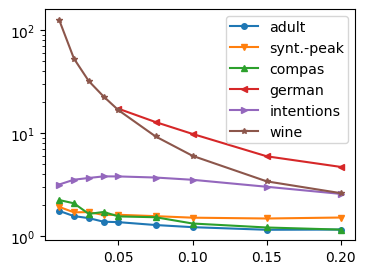

In [24]:
plotDicts(ratio_i['improvement'], marker= True, yscale='log', legendSize=10.2)

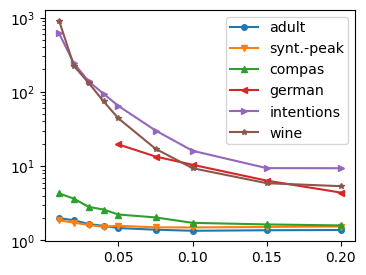

In [25]:
plotDicts(ratio_i['all'], marker= True, yscale='log', legendSize=10.2)

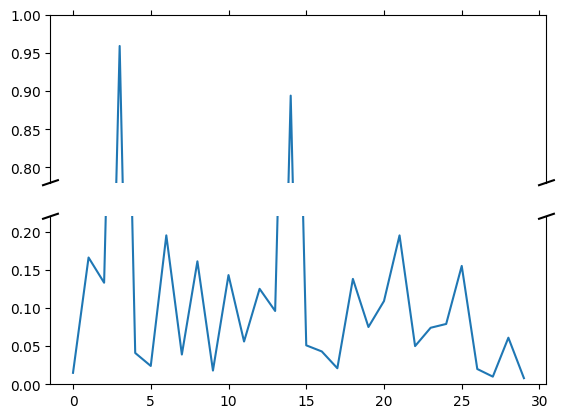

In [134]:
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()





# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()